In [18]:
# !pip install numpy matplotlib pandas

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
X = np.random.rand(100, 1)
noise = np.random.normal(0, 0.1, 100).reshape(-1, 1)

y = 6 + 3 * X + noise

y = y.flatten()

In [21]:
X[:2], y[:2]

(array([[0.08003836],
        [0.09983552]]),
 array([6.21730528, 6.22142807]))

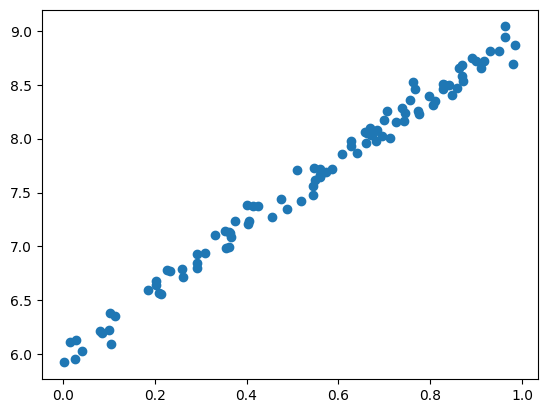

In [22]:
plt.plot(X, y, 'o')

{'w': 3.016666277797535, 'b': 5.990763048012069}


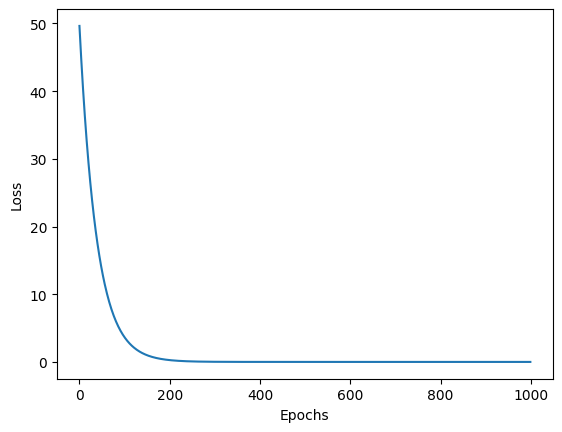

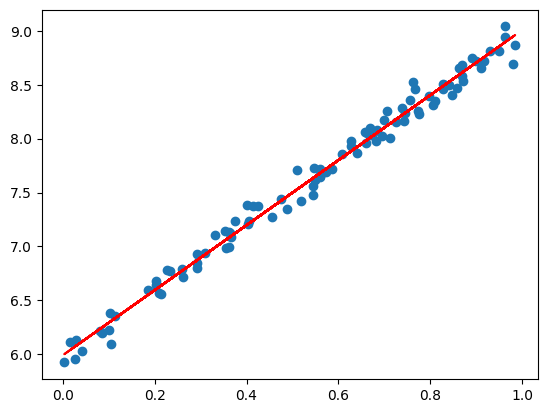

In [23]:
class MyLinearRegression:
    def __init__(self):
        self.params = {}
        self.params['w'] = np.random.rand()
        self.params['b'] = np.random.rand()
    
    def predict(self, X):
        y_hat =  self.params['w'] * X  + self.params['b']
        y_hat = y_hat.flatten()
        return y_hat
    
    def loss(self, y, y_hat):
        return np.mean((y_hat - y)**2)
    
    def gradient(self, X, y, y_hat):
        dw = np.mean((y_hat - y) * X)
        db = np.mean(y_hat - y)

        grads = {
            'dw': dw, 
            'db': db
        }
        return grads
    
    def fit(self, X, y, epochs=100, lr=0.1, verbose=True):
        self.losses = []
        for _ in range(epochs):
            # updating the weights
            y_hat = self.predict(X)
            grads = self.gradient(X, y, y_hat)
            self.params['w'] = self.params['w'] -  lr * grads['dw']
            self.params['b'] = self.params['b'] -  lr * grads['db']

            # printing the loss and plotting the curve
            loss = self.loss(y, y_hat)
            self.losses.append(loss)
            if verbose:
                print(f'w: {self.params["w"]}, b: {self.params["b"]}', end='-->')
                print(f'Epoch: {_}, Loss: {loss}')

            
    def plot_training_curve(self):
        plt.plot(self.losses, label='Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

my_model = MyLinearRegression()
my_model.fit(X, y,epochs=1000,lr=0.01, verbose=False)
print(my_model.params)
my_model.plot_training_curve()
plt.scatter(X, y)
plt.plot(X, my_model.predict(X), color='r')

# Logistic Regression

Reading Dataset

In [24]:
df = pd.read_csv('breast-cancer.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
X = df[['radius_mean']].to_numpy()
y = df['diagnosis'].map({'M': 1, 'B': 0}).to_numpy()

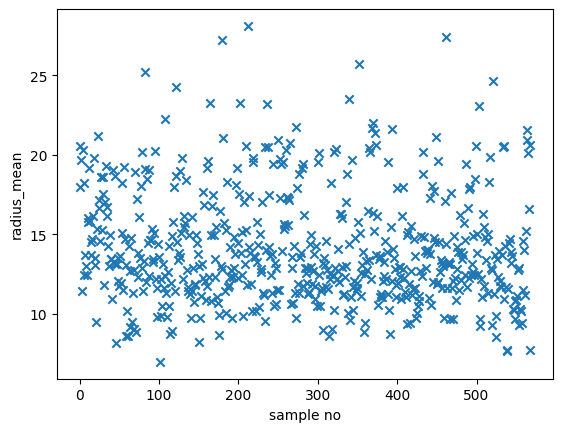

In [26]:
plt.scatter(range(len(X)), X, marker='x')
plt.xlabel('sample no')
plt.ylabel('radius_mean')
plt.show()

In [27]:
X[:2], y[:2]

(array([[17.99],
        [20.57]]),
 array([1, 1], dtype=int64))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9122807017543859

In [31]:
print(f"The weights for the logistic regression model is  w: {model.coef_}  b: {model.intercept_}")

The weights for the logistic regression model is  w: [[0.94882873]]  b: [-14.03968131]


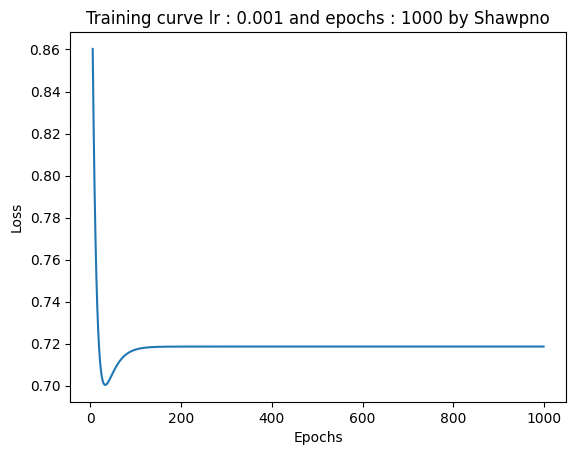

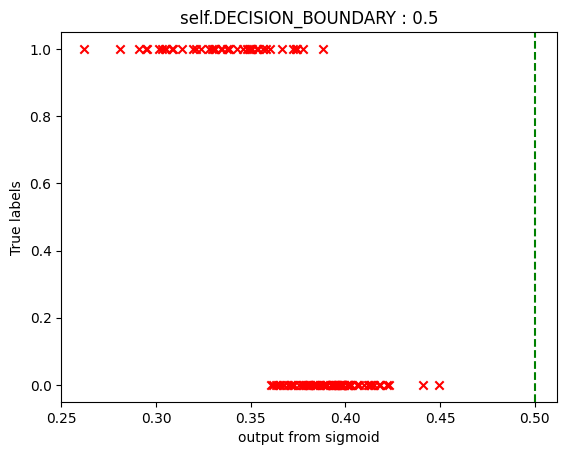

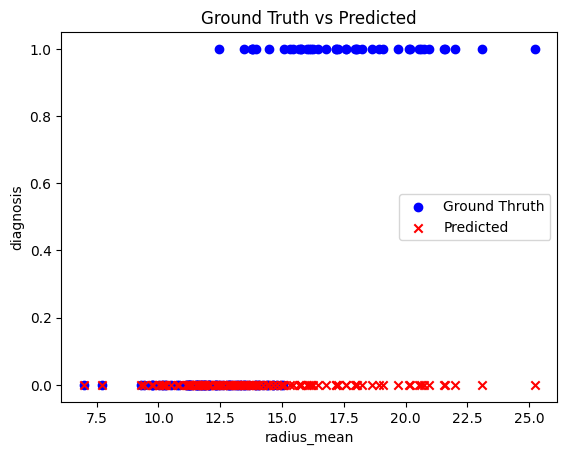

{'w': -0.04564426844504017, 'b': 0.11471801088038087}
Accuracy: 0.6228070175438597
DECISION BOUNDARY :  0.5
lr :  0.001
epochs :  1000


In [76]:
import numpy as np
import matplotlib.pyplot as plt

class MyLogisticRegression:
    def __init__(self, decissionBoundary = 0.5) -> None:
        self.params = {}
        self.params['w'] = np.random.rand()
        self.params['b'] = np.random.rand()
        self.DECISION_BOUNDARY = decissionBoundary

        # self.DECISION_BOUNDARY = 0.5
    
    def predict(self, X):
        y_hat = self.forward(X)
        # Now we need to convert the y_hat to 0 or 1 based on the decision boundary
        # Use a logic similar to following one
        # If y_hat[i] > self.DECISION_BOUNDARY:
        #     y_hat[i] = 0 
        # else:
        #     y_hat[i] = 1
        y_hat = np.where(y_hat > self.DECISION_BOUNDARY, 1, 0)

        return y_hat
    
    def forward(self, X):
        y_hat = self.params['w'] * X + self.params['b']
        # Now pass y_hat through the sigmoid function
        # y_hat = ?
        # Now flatten the y_hat
        # y_hat = ?
        y_hat = 1 / (1 + np.exp(- y_hat))
        y_hat = y_hat.flatten()
        
        return y_hat
    
    def loss(self, y, y_hat):
        return -np.mean(y * np.log(y_hat + np.finfo(np.float64).eps) + (1 - y) * np.log(1 - y_hat + np.finfo(np.float64).eps))
    
    def gradient(self, X, y, y_hat):
        # calculate dw and db; 
        # Short hint: the formula is same as linear regression. 
        dw = np.mean((y_hat - y) * X) # change this to the correct value
        db = np.mean(y_hat - y)  # change this to the correct value. Refer to the notes section 5.6.1
        grads = {
            'dw': dw,
            'db': db
        }
        return grads
    
    
    def fit(self, X, y, epochs=1000, lr=0.01, verbose=True):
        self.stats = {
            'epoch': [],
            'loss': [],
            'epochs': epochs,
            'lr' : lr,
            'Decission Boundary' : self.DECISION_BOUNDARY
        }
        for epoch in range(epochs):
            # what will y_hat be? 
            # y_hat = self.forward(X) or y_hat = self.predict(X) ?  
            # Refer to notes section 5.6.1
            y_hat = self.forward(X)

            # fill up the parts like Linear Regression
            grads = self.gradient(X, y, y_hat)

            self.params['w'] = self.params['w'] - lr * grads['dw']
            self.params['b'] = self.params['b'] - lr * grads['db']



            loss = self.loss(y, y_hat)
            if verbose and epoch % 100 == 0:
                print(f'Epoch: {epoch}, Loss: {loss}, w: {self.params["w"]}, b: {self.params["b"]}')
            self.stats['epoch'].append(epoch)
            self.stats['loss'].append(loss)
    
    def plot_training_curve(self):
        plt.plot(self.stats['epoch'][5:], self.stats['loss'][5:])
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Training curve lr : {self.stats['lr']} and epochs : {self.stats['epochs']} by Shawpno')
        plt.show()

    def plot_decision_boundary(self, X, y):
        # the function helps to plot the decision boundary
        plt.scatter(self.forward(X), y, color='r', marker='x')
        plt.axvline(x=self.DECISION_BOUNDARY, color='g', linestyle='--')
        plt.xlabel('output from sigmoid')
        plt.ylabel('True labels')
        plt.title(f'self.DECISION_BOUNDARY : {self.stats['Decission Boundary']}')
        plt.show()


my_model = MyLogisticRegression()
my_model.fit(X_train, y_train, epochs=1000, lr=0.001, verbose=False)
my_model.plot_training_curve()
my_model.plot_decision_boundary(X_test, y_test)

plt.scatter(X_test, y_test, color='b', marker='o', label='Ground Thruth')
plt.scatter(X_test, my_model.predict(X_test), color='r', marker='x', label='Predicted')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.title('Ground Truth vs Predicted')
plt.legend()
plt.show()

print(my_model.params)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, my_model.predict(X_test)))
print('DECISION BOUNDARY : ', my_model.DECISION_BOUNDARY )
print('lr : ',my_model.stats['lr'])
print('epochs : ',my_model.stats['epochs'])


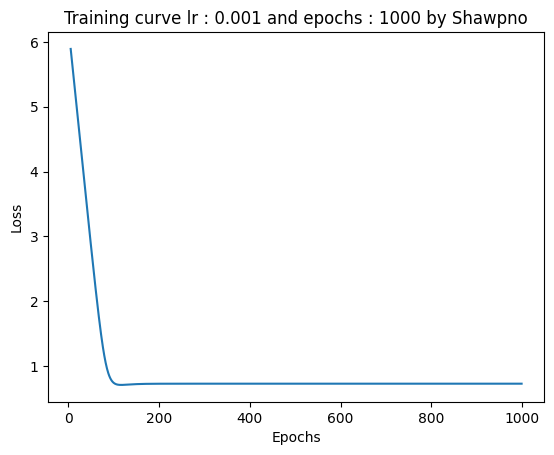

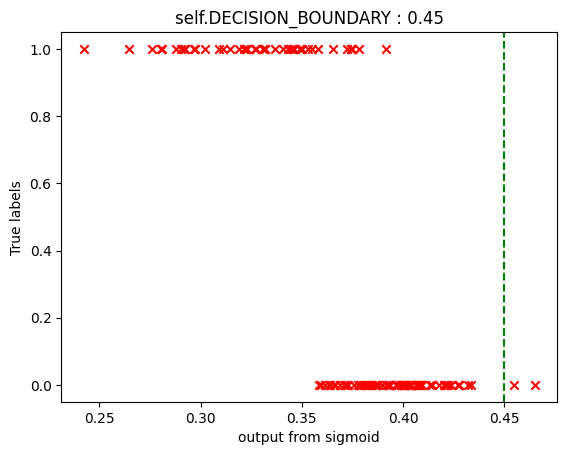

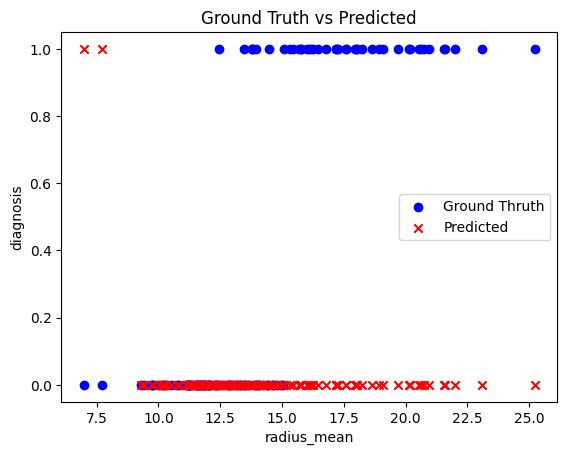

{'w': -0.05478687637383531, 'b': 0.24215808594841914}
Accuracy: 0.6052631578947368
DECISION BOUNDARY :  0.45
lr :  0.001
epochs :  1000


In [130]:
my_model = MyLogisticRegression(decissionBoundary=0.45)
my_model.fit(X_train, y_train, epochs=1000, lr=0.001, verbose=False)
my_model.plot_training_curve()
my_model.plot_decision_boundary(X_test, y_test)

plt.scatter(X_test, y_test, color='b', marker='o', label='Ground Thruth')
plt.scatter(X_test, my_model.predict(X_test), color='r', marker='x', label='Predicted')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.title('Ground Truth vs Predicted')
plt.legend()
plt.show()

print(my_model.params)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, my_model.predict(X_test)))
print('DECISION BOUNDARY : ', my_model.DECISION_BOUNDARY )
print('lr : ',my_model.stats['lr'])
print('epochs : ',my_model.stats['epochs'])

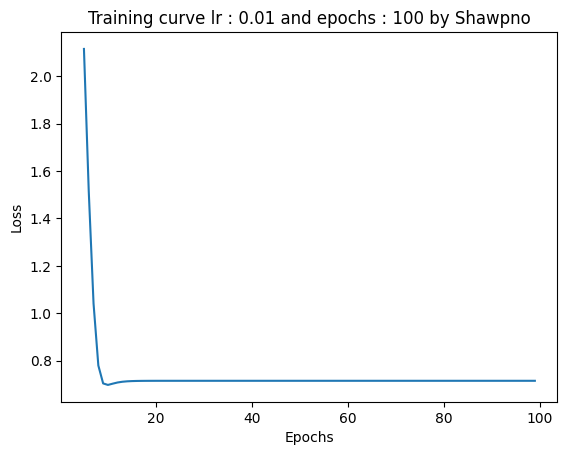

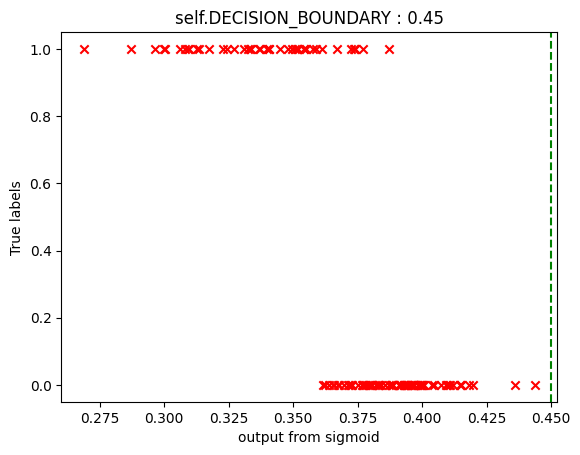

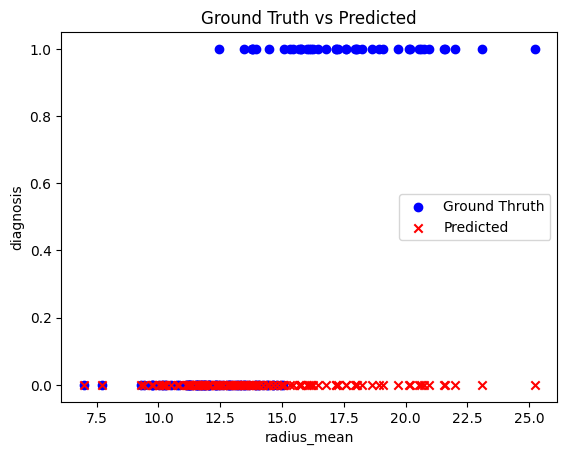

{'w': -0.042452760371742934, 'b': 0.07015650411171863}
Accuracy: 0.6228070175438597
DECISION BOUNDARY :  0.45
lr :  0.01
epochs :  100


In [132]:
my_model = MyLogisticRegression(decissionBoundary=0.45)
my_model.fit(X_train, y_train, epochs=100, lr=0.01, verbose=False)
my_model.plot_training_curve()
my_model.plot_decision_boundary(X_test, y_test)

plt.scatter(X_test, y_test, color='b', marker='o', label='Ground Thruth')
plt.scatter(X_test, my_model.predict(X_test), color='r', marker='x', label='Predicted')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.title('Ground Truth vs Predicted')
plt.legend()
plt.show()

print(my_model.params)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, my_model.predict(X_test)))
print('DECISION BOUNDARY : ', my_model.DECISION_BOUNDARY )
print('lr : ',my_model.stats['lr'])
print('epochs : ',my_model.stats['epochs'])

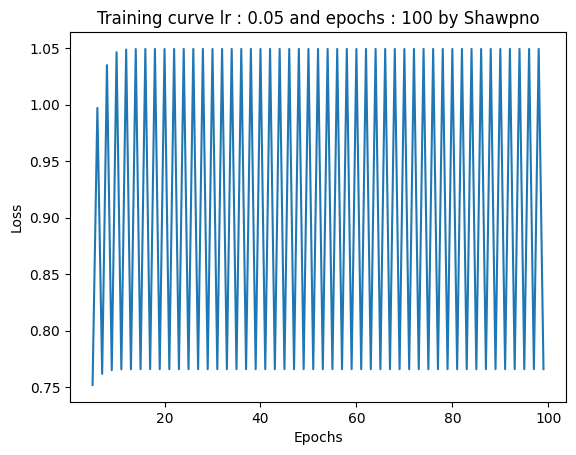

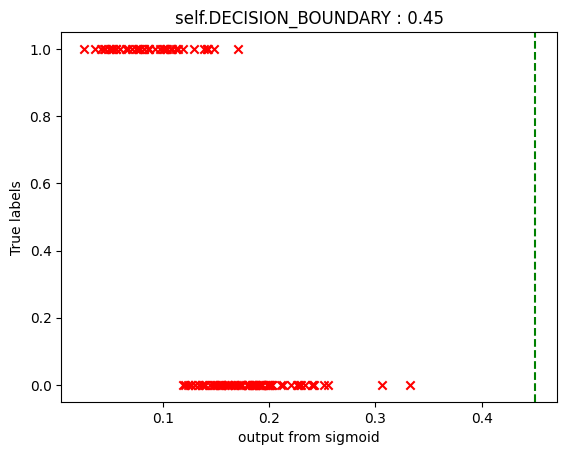

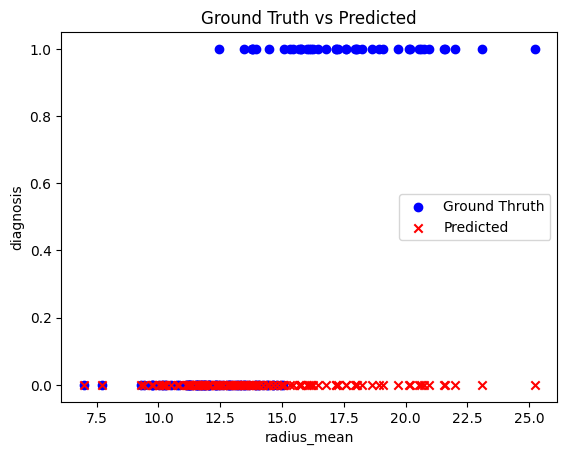

{'w': -0.1619036172253054, 'b': 0.43357237192975945}
Accuracy: 0.6228070175438597
DECISION BOUNDARY :  0.45
lr :  0.05
epochs :  100


In [135]:
my_model = MyLogisticRegression(decissionBoundary=0.45)
my_model.fit(X_train, y_train, epochs=100, lr=0.05, verbose=False)
my_model.plot_training_curve()
my_model.plot_decision_boundary(X_test, y_test)

plt.scatter(X_test, y_test, color='b', marker='o', label='Ground Thruth')
plt.scatter(X_test, my_model.predict(X_test), color='r', marker='x', label='Predicted')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.title('Ground Truth vs Predicted')
plt.legend()
plt.show()

print(my_model.params)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, my_model.predict(X_test)))
print('DECISION BOUNDARY : ', my_model.DECISION_BOUNDARY )
print('lr : ',my_model.stats['lr'])
print('epochs : ',my_model.stats['epochs'])

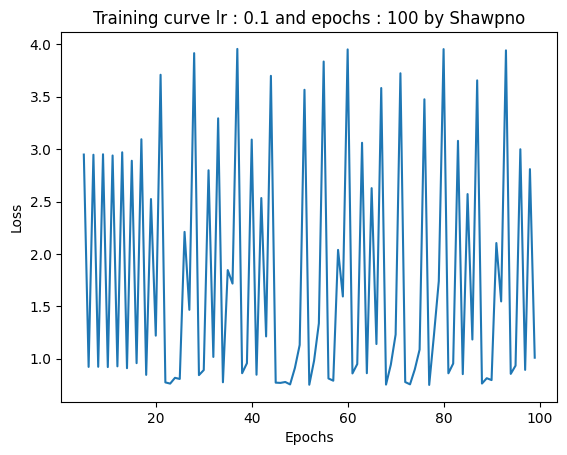

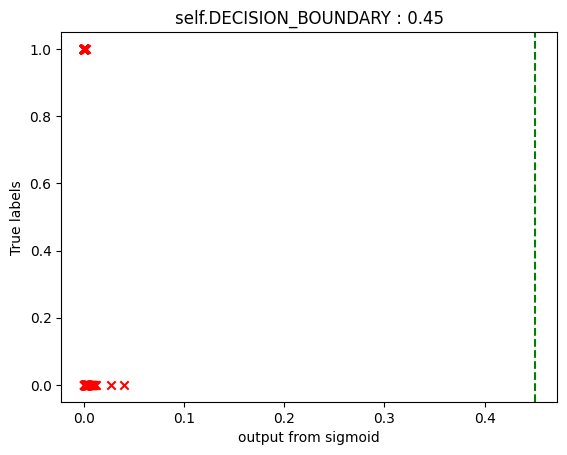

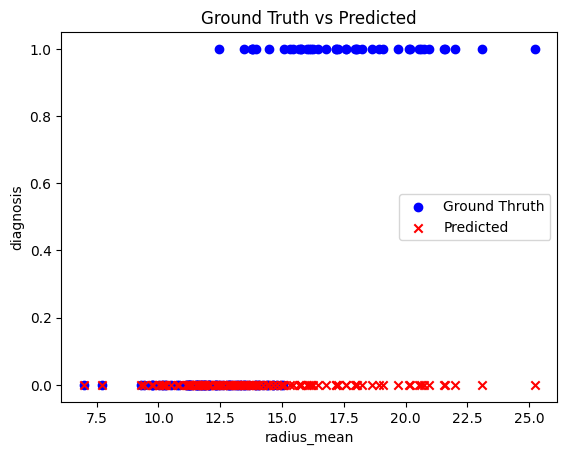

{'w': -0.5403498103349371, 'b': 0.6082662773483073}
Accuracy: 0.6228070175438597
DECISION BOUNDARY :  0.45
lr :  0.1
epochs :  100


In [138]:
my_model = MyLogisticRegression(decissionBoundary=0.45)
my_model.fit(X_train, y_train, epochs=100, lr=0.1, verbose=False)
my_model.plot_training_curve()
my_model.plot_decision_boundary(X_test, y_test)

plt.scatter(X_test, y_test, color='b', marker='o', label='Ground Thruth')
plt.scatter(X_test, my_model.predict(X_test), color='r', marker='x', label='Predicted')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.title('Ground Truth vs Predicted')
plt.legend()
plt.show()

print(my_model.params)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, my_model.predict(X_test)))
print('DECISION BOUNDARY : ', my_model.DECISION_BOUNDARY )
print('lr : ',my_model.stats['lr'])
print('epochs : ',my_model.stats['epochs'])

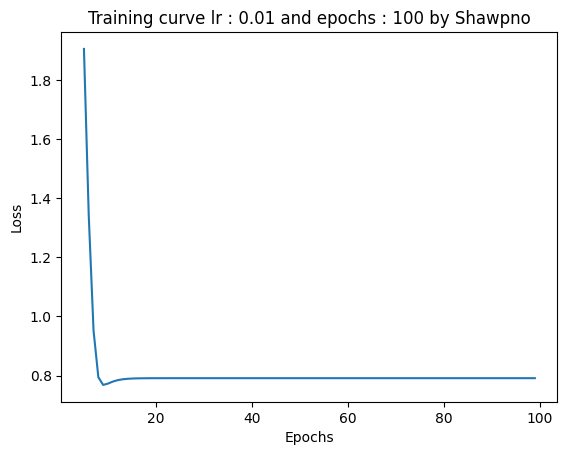

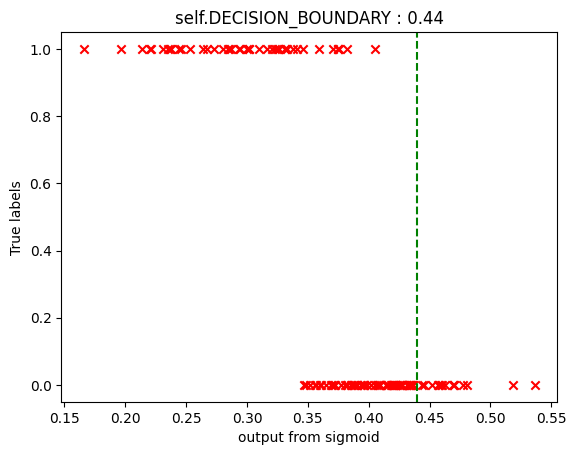

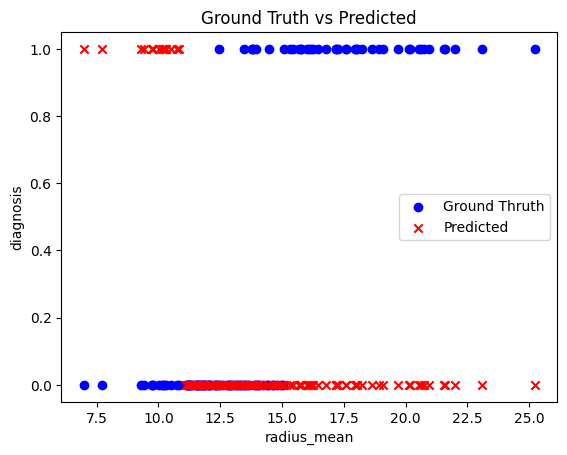

{'w': -0.09655195504617448, 'b': 0.8202076577072578}
Accuracy: 0.49122807017543857
DECISION BOUNDARY :  0.44
lr :  0.01
epochs :  100


In [165]:
my_model = MyLogisticRegression(decissionBoundary=0.44)
my_model.fit(X_train, y_train, epochs=100, lr=0.01, verbose=False)
my_model.plot_training_curve()
my_model.plot_decision_boundary(X_test, y_test)

plt.scatter(X_test, y_test, color='b', marker='o', label='Ground Thruth')
plt.scatter(X_test, my_model.predict(X_test), color='r', marker='x', label='Predicted')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.title('Ground Truth vs Predicted')
plt.legend()
plt.show()

print(my_model.params)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, my_model.predict(X_test)))
print('DECISION BOUNDARY : ', my_model.DECISION_BOUNDARY )
print('lr : ',my_model.stats['lr'])
print('epochs : ',my_model.stats['epochs'])

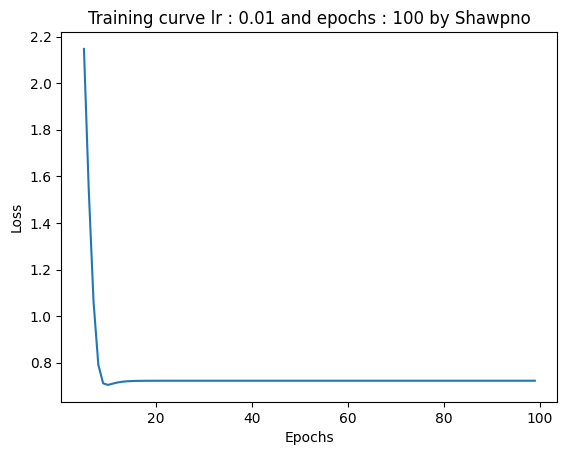

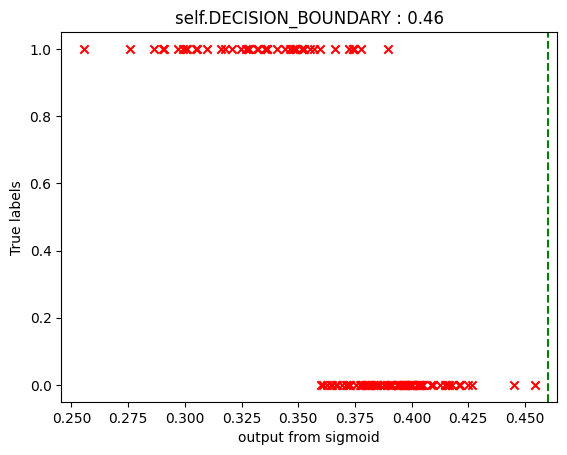

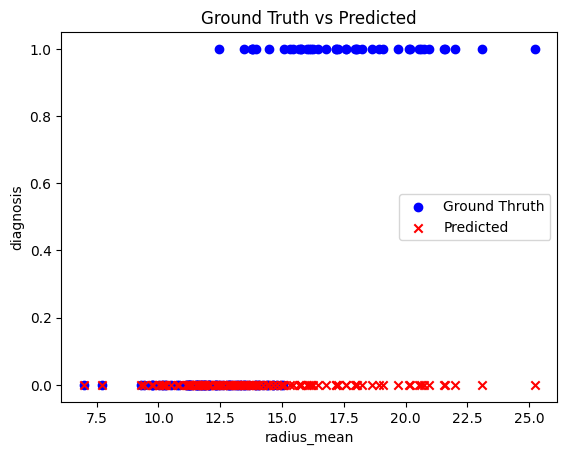

{'w': -0.04860741246262442, 'b': 0.15605653426481206}
Accuracy: 0.6228070175438597
DECISION BOUNDARY :  0.46
lr :  0.01
epochs :  100


In [155]:
my_model = MyLogisticRegression(decissionBoundary=0.46)
my_model.fit(X_train, y_train, epochs=100, lr=0.01, verbose=False)
my_model.plot_training_curve()
my_model.plot_decision_boundary(X_test, y_test)

plt.scatter(X_test, y_test, color='b', marker='o', label='Ground Thruth')
plt.scatter(X_test, my_model.predict(X_test), color='r', marker='x', label='Predicted')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.title('Ground Truth vs Predicted')
plt.legend()
plt.show()

print(my_model.params)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, my_model.predict(X_test)))
print('DECISION BOUNDARY : ', my_model.DECISION_BOUNDARY )
print('lr : ',my_model.stats['lr'])
print('epochs : ',my_model.stats['epochs'])